** RL Assignment one **

---


 I defines a grid world environment and implements the value iteration algorithm to find the optimal policy for navigating the grid world
 The grid world is represented as a 5x5 grid, where each cell represents a state. The start state is at (0, 0) and the goal state is at (4, 4). There are also some cells with negative rewards defined in the REWARDS dictionary. The get_reward function returns the reward for a given state. It returns 10 for the goal state, the predefined negative reward for specific states, and -1 for all other states.

 To improve the results, we can experiment with different values of gamma (the discount factor) and epsilon (the convergence threshold). You can also try different grid sizes, reward structures, or action sets to see how they affect the optimal policy.

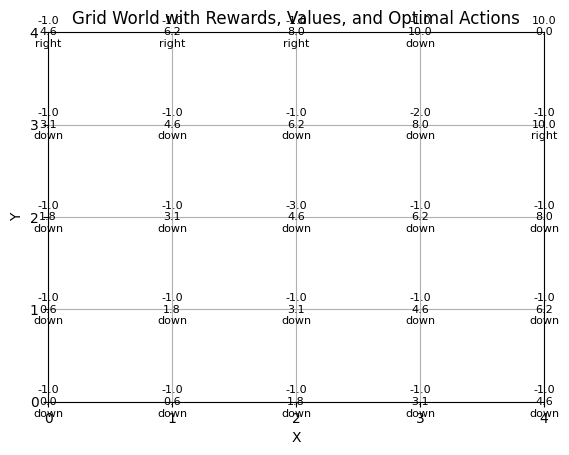

In [1]:
import matplotlib.pyplot as plt

# Define grid world size, start, goal, and rewards
SIZE = 5
START = (0, 0)
GOAL = (4, 4)
REWARDS = {
    (2, 2): -3,
    (3, 3): -2,
}

# Define actions and their corresponding directions
ACTIONS = {
    "up": (-1, 0),
    "down": (1, 0),
    "left": (0, -1),
    "right": (0, 1),
}

# Define discount factor
GAMMA = 0.9


def get_next_state(state, action):
    """
    Get the next state based on the current state and action.
    """
    row, col = state
    dx, dy = ACTIONS[action]
    new_row, new_col = row + dx, col + dy
    if 0 <= new_row < SIZE and 0 <= new_col < SIZE:
        return new_row, new_col
    else:
        return state


def get_reward(state):
    """
    Get the reward for the given state.
    """
    if state == GOAL:
        return 10
    elif state in REWARDS:
        return REWARDS[state]
    else:
        return -1


def value_iteration(rewards, gamma, epsilon=0.01):
    """
    Perform value iteration to find the optimal policy.
    """
    value_function = [[0 for _ in range(SIZE)] for _ in range(SIZE)]
    policy = [[" " for _ in range(SIZE)] for _ in range(SIZE)]

    while True:
        max_delta = 0
        for i in range(SIZE):
            for j in range(SIZE):
                if (i, j) == GOAL:
                    continue

                value = value_function[i][j]
                new_value = 0
                for action, (dx, dy) in ACTIONS.items():
                    next_i, next_j = get_next_state((i, j), action)
                    reward = get_reward((next_i, next_j))
                    new_value = max(
                        new_value, reward + gamma * value_function[next_i][next_j]
                    )
                max_delta = max(max_delta, abs(new_value - value))
                value_function[i][j] = new_value

                # Update policy based on highest expected value
                best_action = None
                best_value = float("-inf")
                for action, (dx, dy) in ACTIONS.items():
                    next_i, next_j = get_next_state((i, j), action)
                    expected_value = reward + gamma * value_function[next_i][next_j]
                    if expected_value > best_value:
                        best_value = expected_value
                        best_action = action
                policy[i][j] = best_action

        if max_delta < epsilon:
            break

    return value_function, policy


def visualize_grid(value_function, policy):
    """
    Visualize the grid world with rewards, values, and optimal actions.
    """
    fig, ax = plt.subplots()

    for i in range(SIZE):
        for j in range(SIZE):
            reward = get_reward((i, j))
            value = value_function[i][j]
            action = policy[i][j]

            ax.text(
                j,
                i,
                f"{reward:.1f}\n{value:.1f}\n{action}",
                ha="center",
                va="center",
                fontsize=8,
            )

    ax.set_title("Grid World with Rewards, Values, and Optimal Actions")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_xticks(range(SIZE))
    ax.set_yticks(range(SIZE))
    ax.grid(True)
    plt.show()


# Perform value iteration and visualize the results
value_function, policy = value_iteration(REWARDS, GAMMA)
visualize_grid(value_function, policy)



I implements the Q-learning algorithm to learn the optimal policy for navigating the grid world.We calculate the next state and the reward given the current state and the action taken in a grid world environment.
To improve the results, you can experiment with different values of EPSILON (the exploration rate), ALPHA (the learning rate), GAMMA (the discount factor), and NUM_EPISODES (the number of episodes). Tuning these hyperparameters can lead to better convergence and more optimal policies. Additionally, you can modify the grid world setup, reward structure, or action set to see how they impact the learning process and the learned policy.

State: (0, 0), Q-values: [-1.52117837 -0.47256856 -1.88598727 -0.434062  ]
State: (0, 1), Q-values: [-0.50658672  0.62882    -1.39668708  0.22945271]
State: (0, 2), Q-values: [-2.26219063 -0.13492344 -1.38304897  1.79320349]
State: (0, 3), Q-values: [ 0.1915481   3.12198424 -1.7361875  -1.545     ]
State: (0, 4), Q-values: [-1.2125   -1.48875  -1.690625 -1.42625 ]
State: (1, 0), Q-values: [-3.11726823 -2.89795977 -1.66713598  0.62773003]
State: (1, 1), Q-values: [-0.46104008 -0.71849359 -0.64191584  1.8098    ]
State: (1, 2), Q-values: [0.41447316 1.82554221 0.60992586 3.122     ]
State: (1, 3), Q-values: [1.78862737 4.58       1.0882875  1.69833025]
State: (1, 4), Q-values: [-1.5224375  -1.1         3.11651638 -1.42625   ]
State: (2, 0), Q-values: [-2.65006627 -2.30590625 -2.26219063 -1.7995613 ]
State: (2, 1), Q-values: [-1.97697188 -2.00390625 -1.9674375   1.92467643]
State: (2, 2), Q-values: [-1.5280625  -1.20125    -1.18875     4.57504121]
State: (2, 3), Q-values: [2.09774973 6.14

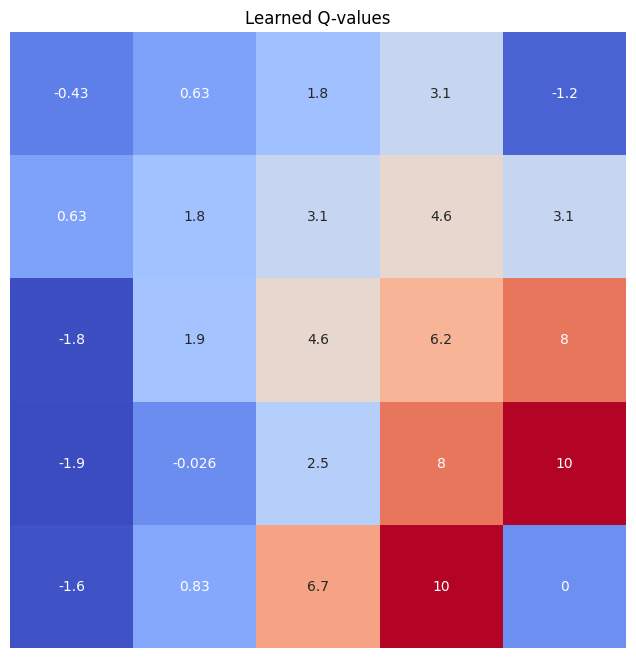

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
GRID_SIZE = 5
NUM_EPISODES = 200
ALPHA = 0.5
GAMMA = 0.9
EPSILON = 0.1

# Actions
UP = 0
DOWN = 1
LEFT = 2
RIGHT = 3

# Define the grid world
grid_world = np.zeros((GRID_SIZE, GRID_SIZE))

# Define the Q-table
q_table = np.zeros((GRID_SIZE, GRID_SIZE, 4))

# Define the goal state
goal_state = (4, 4)

# Helper function to get the next state and reward based on the action
def get_next_state_and_reward(current_state, action):
    x, y = current_state

    if action == UP:
        next_state = (max(x - 1, 0), y)
    elif action == DOWN:
        next_state = (min(x + 1, GRID_SIZE - 1), y)
    elif action == LEFT:
        next_state = (x, max(y - 1, 0))
    elif action == RIGHT:
        next_state = (x, min(y + 1, GRID_SIZE - 1))

    if next_state == goal_state:
        reward = 10
    else:
        reward = -1

    return next_state, reward

# Q-learning algorithm
for _ in range(NUM_EPISODES):
    current_state = (0, 0)
    while current_state != goal_state:
        # Choose action epsilon-greedily
        if np.random.uniform(0, 1) < EPSILON:
            action = np.random.randint(0, 4)
        else:
            action = np.argmax(q_table[current_state[0], current_state[1]])

        next_state, reward = get_next_state_and_reward(current_state, action)

        # Update Q-value
        q_table[current_state[0], current_state[1], action] += ALPHA * (reward + GAMMA * np.max(q_table[next_state[0], next_state[1]]) - q_table[current_state[0], current_state[1], action])

        current_state = next_state

# Print the learned Q-values
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        print(f"State: ({i}, {j}), Q-values: {q_table[i, j]}")

# Visualize the learned Q-values
plt.figure(figsize=(12, 8))
sns.heatmap(np.max(q_table, axis=2), annot=True, cmap="coolwarm", square=True, cbar=False, xticklabels=False, yticklabels=False)
plt.title("Learned Q-values")
plt.show()
